In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

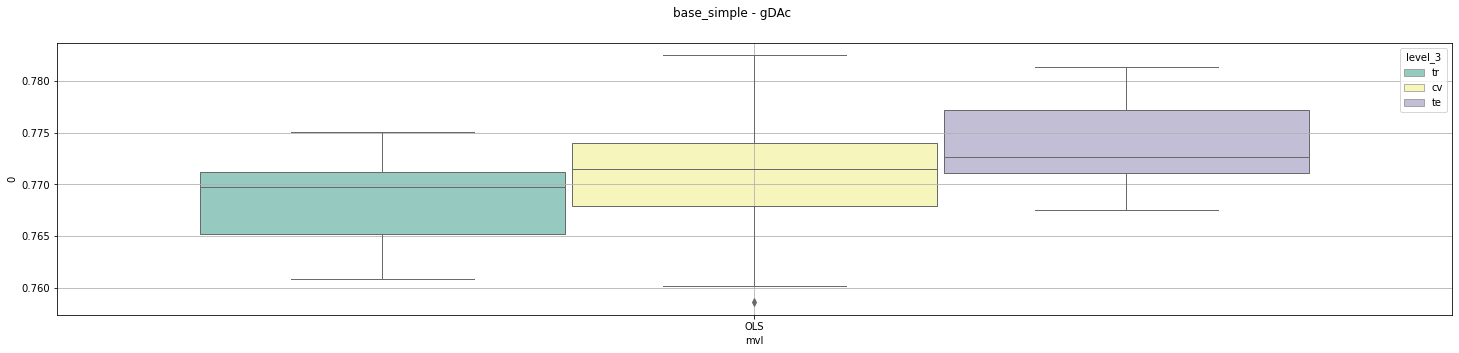

In [5]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

file_loc_lst = [
    r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/final_outputs-old/Figure_7_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/final_outputs-old/Figure_1_2_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs-old-wds/Figure_1_2-mse_sctr.csv'
]

for file_loc in file_loc_lst:
    concat = pd.read_csv(file_loc)
    
    run_name = concat.loc[0, 'name']
    
    concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
    concat['model_version'] = concat['model_version'].str.replace('____',  '.')
    concat['model_version'] = concat['model_version'].str.replace('alpha','α=')
    concat['model_version'] = concat['model_version'].str.replace('l1_ratio','l1r=')
    # concat['model_version'] = concat['model_version'].apply(lambda x: ' / '.join(['='.join([_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))]) for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version'] = concat['model_version'].str.replace('base_','')
    concat['model_version'] = concat['model_version'].str.replace('simple_','')
    concat['model_version'] = concat['model_version'].str.replace('words_','')
    concat['model_version'] = concat['model_version'].apply(lambda x: ([{_.split('=')[0]: strrev(strrev(_.split('=')[1]).zfill(4))} for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version'] = concat['model_version'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)

    concat['label'] = concat['model_version'].apply(lambda x: get_label(x))
    concat = concat.drop('model_version', axis=1)

    # concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
    concat = concat.set_index(['channel', 'name', 'label', 'run_num']).drop('mouse_id', axis=1)

    # vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)

    for chl in concat.reset_index()['channel'].unique():

        fig, ax = plt.subplots(1,1,figsize=(25,5))

        fig.suptitle(f'{run_name} - {chl}')
        fig.set_facecolor('w')

        vwyc = concat.loc[chl].values
        ymn, ymx = np.min(vwyc), np.max(vwyc)

        vbp = concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
        vbp['mvl'] = vbp['label']
    #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
    #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
        vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
        vbp = vbp.sort_values(['mvl', 'level_3'])

        vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
        vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])

        sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
        ax.grid(True)
        plt.xticks(rotation=0)